In [1]:
import torch

In [2]:
import pandas as pd
import numpy as np

import copy
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, transforms

In [3]:
torch.autograd.set_detect_anomaly(True)

In [4]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [5]:
data_clinical= pd.read_excel('patient-clinical-data.xlsx')

In [6]:
data_clinical.head()

,Patient ID,Age(years),Tumour Size(cm),Tumour Type,ER,PR,HER2,HER2 Expression,Histological grading,Surgical,Ki67,Molecular subtype,Number of lymph node metastases,ALN status
0,1,77,3.0,Other type,Positive,Positive,Negative,0,NaN,Axillary lymph node dissection,0.01,Luminal A,0,N0
1,2,39,3.5,Invasive ductal carcinoma,Negative,Negative,Negative,0,3.0,Sentinel lymph node biopsy,0.4,Triple negative,4,N+(>2)
2,3,52,3.0,Invasive ductal carcinoma,Positive,Positive,Negative,0,2.0,Axillary lymph node dissection,0.06,Luminal A,7,N+(>2)
3,4,60,2.3,Other type,Negative,Negative,Positive,3+,NaN,Axillary lymph node dissection,0.6,HER2(+),0,N0
4,5,71,3.5,Invasive ductal carcinoma,Negative,Negative,Negative,0,NaN,Axillary lymph node dissection,0.12,Triple negative,0,N0


In [7]:
data_clinical.columns

Index(['Patient ID', 'Age(years)', 'Tumour Size(cm)', 'Tumour Type', 'ER',
       'PR', 'HER2', 'HER2 Expression', 'Histological grading', 'Surgical',
       'Ki67', 'Molecular subtype', 'Number of lymph node metastases',
       'ALN status'],
      dtype='object')

In [8]:
data=data_clinical[['Patient ID','ALN status']]

In [9]:

data

,Patient ID,ALN status
0,1,N0
1,2,N+(>2)
2,3,N+(>2)
3,4,N0
4,5,N0
...,...,...
1053,1054,N0
1054,1055,N0
1055,1056,N0
1056,1057,N+(>2)


In [10]:
#dataset_dir='paper_patches/patches'

In [11]:
#dataset_dir

In [12]:
import os

In [13]:
#dataout_dir='paper_patches/LabeledDataset'

In [14]:
data['ALN status'].unique()

array(['N0', 'N+(>2)', 'N+(1-2)'], dtype=object)

In [15]:
'''

N0=os.path.join(dataout_dir,'N0')
N1=os.path.join(dataout_dir,'N+(1-2)')
N2=os.path.join(dataout_dir, 'N+(1-2)')
N3=os.path.join(dataout_dir, 'N3')
os.makedirs(N0, exist_ok=True)
os.makedirs(N1, exist_ok=True)
os.makedirs(N2, exist_ok=True)
os.makedirs(N3, exist_ok=True)
'''

"\n\nN0=os.path.join(dataout_dir,'N0')\nN1=os.path.join(dataout_dir,'N+(1-2)')\nN2=os.path.join(dataout_dir, 'N+(1-2)')\nN3=os.path.join(dataout_dir, 'N3')\nos.makedirs(N0, exist_ok=True)\nos.makedirs(N1, exist_ok=True)\nos.makedirs(N2, exist_ok=True)\nos.makedirs(N3, exist_ok=True)\n"

In [16]:
'''

value_to_filter=['N0']
filter_df1=data[data['ALN status'].isin(value_to_filter)] 
filter_df1
'''

"\n\nvalue_to_filter=['N0']\nfilter_df1=data[data['ALN status'].isin(value_to_filter)] \nfilter_df1\n"

In [17]:
#new_df1=filter_df1['Patient ID'].tolist()

In [18]:
#new_df1

In [19]:

'''
value_to_filter1=['N+(>2)']
filter_df2=data[data['ALN status'].isin(value_to_filter1)] 
filter_df2


new_df2=filter_df2['Patient ID'].tolist()
new_df2
'''

"\nvalue_to_filter1=['N+(>2)']\nfilter_df2=data[data['ALN status'].isin(value_to_filter1)] \nfilter_df2\n\n\nnew_df2=filter_df2['Patient ID'].tolist()\nnew_df2\n"

In [20]:
'''

value_to_filter2=['N+(1-2)']
filter_df3=data[data['ALN status'].isin(value_to_filter2)] 
filter_df3


new_df3=filter_df3['Patient ID'].tolist()
new_df3
'''

"\n\nvalue_to_filter2=['N+(1-2)']\nfilter_df3=data[data['ALN status'].isin(value_to_filter2)] \nfilter_df3\n\n\nnew_df3=filter_df3['Patient ID'].tolist()\nnew_df3\n"

In [21]:
#new_df1, new_df2, new_df3

In [22]:
#folder_mappings={'N0': new_df1, 'N+(1-2)': new_df3, 'N3': new_df2}
#folder_mappings.items()

In [23]:
import shutil 

In [24]:
'''

for destination_folder, source_folder in folder_mappings.items():
    for i in source_folder:
        destination_path= os.path.join('paper_patches\LabeledDataset', destination_folder)
        source_path= os.path.join(dataset_dir, str(i))
      
        if os.path.exists(source_path):
            if not os.path.exists(destination_path):
                os.makedirs(destination_path)
        
            for filename in os.listdir(source_path):
                source_file= os.path.join(source_path, filename)
                destination_file=os.path.join(destination_path, filename)
                shutil.move(source_file, destination_file)
            print(f"moved files from '{i}' to '{destination_folder}'")
    
    


print('All operations completed.')

'''

'\n\nfor destination_folder, source_folder in folder_mappings.items():\n    for i in source_folder:\n        destination_path= os.path.join(\'paper_patches\\LabeledDataset\', destination_folder)\n        source_path= os.path.join(dataset_dir, str(i))\n      \n        if os.path.exists(source_path):\n            if not os.path.exists(destination_path):\n                os.makedirs(destination_path)\n        \n            for filename in os.listdir(source_path):\n                source_file= os.path.join(source_path, filename)\n                destination_file=os.path.join(destination_path, filename)\n                shutil.move(source_file, destination_file)\n            print(f"moved files from \'{i}\' to \'{destination_folder}\'")\n    \n    \n\n\nprint(\'All operations completed.\')\n\n'

In [25]:
mean=[0.485,0.456,0.406]
std=[0.229,0.224,0.225]

In [26]:
train_transform=transforms.Compose([transforms.RandomResizedCrop(224),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=mean, std=std)])

In [27]:
test_transform=transforms.Compose([transforms.Resize(256),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=mean, std=std)])

In [28]:
#data_dir='paper_patches/patches'

In [29]:
import os
import shutil
import random

In [30]:
# get dataset path directory

#dataset_dir='paper_patches/LabeledDataset'

In [31]:
# set path where split datasets should be ssaved

#dataout_dir='paper_patches/SplitDataset'

In [32]:
'''

# split ratio
split_ratio=0.8

# create output directories for the training and test sets
train_dir=os.path.join(dataout_dir,'train')
test_dir=os.path.join(dataout_dir, 'test')
os.makedirs(train_dir,exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# loop through subdirectories 

for subdir in os.listdir(dataset_dir):
    subdir_path=os.path.join(dataset_dir, subdir)
    
    if os.path.isdir(subdir_path):
        # get a list of all images files in the current subdirectory
        
        image_files=[f for f in os.listdir(subdir_path) if f.endswith('.jpg')]
        
        # shuffle the list of image files
        random.shuffle(image_files)
        
        # calculate number of images to put in training set
        
        num_train=int(len(image_files)* split_ratio)
        
        # split the image files into training and test sets
        
        train_files=image_files[:num_train]
        test_files=image_files[num_train:]
        
        
        for file in train_files:
            src_path=os.path.join(subdir_path, file)
            dest_path=os.path.join(train_dir, subdir)
            
            os.makedirs(dest_path, exist_ok=True)
            shutil.copy(src_path, dest_path)
            
        for file in test_files:
            src_path=os.path.join(subdir_path, file)
            dest_path=os.path.join(test_dir, subdir)
            os.makedirs(dest_path, exist_ok=True)
            shutil.copy(src_path, dest_path)
            
print('Dataset Split into training and test set successfully')

'''

"\n\n# split ratio\nsplit_ratio=0.8\n\n# create output directories for the training and test sets\ntrain_dir=os.path.join(dataout_dir,'train')\ntest_dir=os.path.join(dataout_dir, 'test')\nos.makedirs(train_dir,exist_ok=True)\nos.makedirs(test_dir, exist_ok=True)\n\n# loop through subdirectories \n\nfor subdir in os.listdir(dataset_dir):\n    subdir_path=os.path.join(dataset_dir, subdir)\n    \n    if os.path.isdir(subdir_path):\n        # get a list of all images files in the current subdirectory\n        \n        image_files=[f for f in os.listdir(subdir_path) if f.endswith('.jpg')]\n        \n        # shuffle the list of image files\n        random.shuffle(image_files)\n        \n        # calculate number of images to put in training set\n        \n        num_train=int(len(image_files)* split_ratio)\n        \n        # split the image files into training and test sets\n        \n        train_files=image_files[:num_train]\n        test_files=image_files[num_train:]\n        \n  

In [33]:
train_dir='Dataset/paper_patches/paper_patches/SplitDataset/train'
test_dir='Dataset/paper_patches/paper_patches/SplitDataset/test'


In [34]:
train_dir

'Dataset/paper_patches/paper_patches/SplitDataset/train'

In [35]:
train_data=datasets.ImageFolder(root=train_dir, transform=train_transform)

In [36]:
train_data

Dataset ImageFolder
    Number of datapoints: 61261
    Root location: Dataset/paper_patches/paper_patches/SplitDataset/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [37]:
test_data=datasets.ImageFolder(root=test_dir, transform=test_transform)

In [38]:
test_data

Dataset ImageFolder
    Number of datapoints: 15317
    Root location: Dataset/paper_patches/paper_patches/SplitDataset/test
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [39]:
batch_size=4
num_workers=1

In [40]:
train_loader=torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

In [41]:
test_loader=torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

In [42]:
dataloaders={'train': train_loader,
            'test': test_loader}

In [43]:
class_names=train_data.classes
print(class_names)

['N+(1-2)', 'N0', 'N3']


In [44]:
def imshow(inp, title):
    
    inp=inp.cpu().numpy().transpose((1,2,0))
    inp=std*inp+mean
    inp=np.clip(inp,0,1)
    
    plt.figure(figsize=(12,8))
    
    plt.imshow(inp)
    plt.title(title)
    plt.pause(5)

In [45]:
inputs, classes =next(iter(dataloaders['train']))

In [46]:
out=torchvision.utils.make_grid(inputs)

In [47]:
out.shape

torch.Size([3, 228, 906])

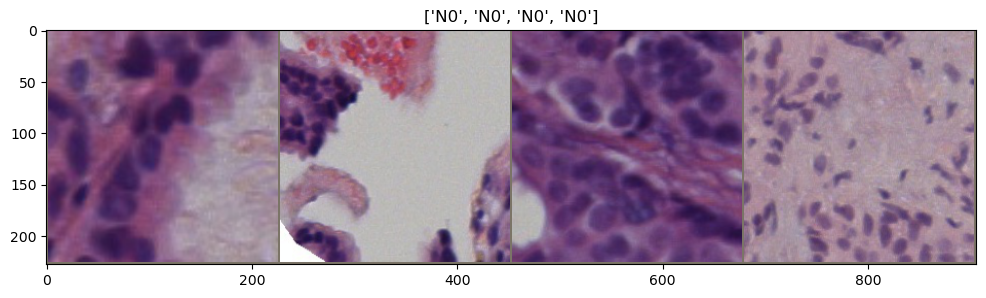

In [48]:
imshow(out, title=[class_names[x] for x in classes])

In [49]:
from torchvision import models

model=models.alexnet()

In [50]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [51]:
num_ftrs=model.classifier[6].in_features
num_ftrs

4096

In [52]:
model.classifier[6]= nn.Linear(num_ftrs,3)

In [53]:

model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [54]:
criterion= nn.CrossEntropyLoss()

optimizer=optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler=lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

In [55]:
'''

def train_model(model, criterion, optimizer, num_epochs=25):
    
    model=model.to(device)
    total_step=len(dataloaders['train'])
    
    for epoch in range(num_epochs):
        print('epoch =',epoch)
        
        for i, (images, labels) in enumerate((dataloaders['train'])):
            
            images=images.to(device)
            labels=labels.to(device)
            
            outputs=model(images)
            outputs=outputs.to(device)
            loss= criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if(i+1) % 100==0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:4f}'.format(epoch+1,num_epochs, i+1, total_step, loss.item()))
                
    return model
    
    
'''

"\n\ndef train_model(model, criterion, optimizer, num_epochs=25):\n    \n    model=model.to(device)\n    total_step=len(dataloaders['train'])\n    \n    for epoch in range(num_epochs):\n        print('epoch =',epoch)\n        \n        for i, (images, labels) in enumerate((dataloaders['train'])):\n            \n            images=images.to(device)\n            labels=labels.to(device)\n            \n            outputs=model(images)\n            outputs=outputs.to(device)\n            loss= criterion(outputs, labels)\n            \n            optimizer.zero_grad()\n            loss.backward()\n            optimizer.step()\n            \n            if(i+1) % 100==0:\n                print('Epoch [{}/{}], Step [{}/{}], Loss: {:4f}'.format(epoch+1,num_epochs, i+1, total_step, loss.item()))\n                \n    return model\n    \n    \n"

In [56]:

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    
    model=model.to(device)
    
    best_acc=0.0
    best_model_wts=copy.deepcopy(model.state_dict())
    
    for epoch in range (num_epochs):
        
        print('Epoch {}/{}'.format(epoch, num_epochs-1))
        print('-'*10)
        
        for phase in ['train','test']:
            
            if phase=='train':
                optimizer.step()
                scheduler.step()
                model.train()
            
            else:
                model.eval()
            running_loss=0.0
            running_corrects=0
            
            for inputs, labels in dataloaders[phase]:
                inputs =inputs.to(device)
                labels=labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase=='train'):
                    outputs = model(inputs)
                    
                    _, preds=torch.max(outputs, 1)
                    
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        
                        
                running_loss +=loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds==labels.data)
                
            epoch_loss= running_loss/total_batch_size[phase]
            epoch_acc=running_corrects.double()/(total_batch_size[phase] * batch_size)
            
            print('{} Loss : {:.4f} ACC: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            
            
            if phase== 'test' and epoch_acc>best_acc:
                best_acc=epoch_acc
                best_model_wts=copy.deepcopy(model.state_dict())
                
    print('Training Complete')
    
    print('Best val Acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model_wts)
    
    return model

In [57]:
total_batch_size={'train': len(train_loader), 'test':len(test_loader)}
total_batch_size

{'train': 15316, 'test': 3830}

In [58]:
model=train_model(model, criterion, optimizer,exp_lr_scheduler, num_epochs=80)

Epoch 0/79
----------
train Loss : 3.5489 ACC: 0.6457
test Loss : 3.4762 ACC: 0.6457
Epoch 1/79
----------
train Loss : 3.4857 ACC: 0.6457
test Loss : 3.4537 ACC: 0.6457
Epoch 2/79
----------
train Loss : 3.4289 ACC: 0.6472
test Loss : 3.3598 ACC: 0.6535
Epoch 3/79
----------
train Loss : 3.3480 ACC: 0.6527
test Loss : 3.4635 ACC: 0.6324
Epoch 4/79
----------
train Loss : 3.1982 ACC: 0.6725
test Loss : 3.0261 ACC: 0.6850
Epoch 5/79
----------
train Loss : 3.0913 ACC: 0.6799
test Loss : 2.9279 ACC: 0.6888
Epoch 6/79
----------
train Loss : 3.0317 ACC: 0.6851
test Loss : 2.8513 ACC: 0.6929
Epoch 7/79
----------
train Loss : 2.9663 ACC: 0.6902
test Loss : 2.7850 ACC: 0.7014
Epoch 8/79
----------
train Loss : 2.9085 ACC: 0.6958
test Loss : 2.8763 ACC: 0.6914
Epoch 9/79
----------
train Loss : 2.8702 ACC: 0.6985
test Loss : 2.6778 ACC: 0.7136
Epoch 10/79
----------
train Loss : 2.8183 ACC: 0.7046
test Loss : 2.7041 ACC: 0.7169
Epoch 11/79
----------
train Loss : 2.7870 ACC: 0.7066
test Loss

In [59]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [115]:
'''

with torch.no_grad():
    
    correct = 0
    total=0
    
    for images, labels in dataloaders['test']:
        
        images=images.to(device)
        labels=labels.to(device)
        
        outputs =model(images)
        _, predicted=torch.max(outputs.data, 1)
        
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
        
        print('Accuracy of the model on the  test images: {}'.format(100*correct/total ))
        
'''

Accuracy of the model on the  test images: 50.0
Accuracy of the model on the  test images: 75.0
Accuracy of the model on the  test images: 66.66666666666667
Accuracy of the model on the  test images: 50.0
Accuracy of the model on the  test images: 50.0
Accuracy of the model on the  test images: 50.0
Accuracy of the model on the  test images: 50.0
Accuracy of the model on the  test images: 43.75
Accuracy of the model on the  test images: 38.888888888888886
Accuracy of the model on the  test images: 45.0
Accuracy of the model on the  test images: 45.45454545454545
Accuracy of the model on the  test images: 50.0
Accuracy of the model on the  test images: 50.0
Accuracy of the model on the  test images: 50.0
Accuracy of the model on the  test images: 46.666666666666664
Accuracy of the model on the  test images: 46.875
Accuracy of the model on the  test images: 47.05882352941177
Accuracy of the model on the  test images: 47.22222222222222
Accuracy of the model on the  test images: 44.7368421

Accuracy of the model on the  test images: 67.8125
Accuracy of the model on the  test images: 67.70186335403727
Accuracy of the model on the  test images: 67.5925925925926
Accuracy of the model on the  test images: 67.48466257668711
Accuracy of the model on the  test images: 67.3780487804878
Accuracy of the model on the  test images: 67.57575757575758
Accuracy of the model on the  test images: 67.7710843373494
Accuracy of the model on the  test images: 67.66467065868264
Accuracy of the model on the  test images: 67.55952380952381
Accuracy of the model on the  test images: 67.15976331360947
Accuracy of the model on the  test images: 67.3529411764706
Accuracy of the model on the  test images: 66.95906432748538
Accuracy of the model on the  test images: 67.15116279069767
Accuracy of the model on the  test images: 67.34104046242774
Accuracy of the model on the  test images: 67.24137931034483
Accuracy of the model on the  test images: 67.42857142857143
Accuracy of the model on the  test ima

Accuracy of the model on the  test images: 66.4983164983165
Accuracy of the model on the  test images: 66.44295302013423
Accuracy of the model on the  test images: 66.5551839464883
Accuracy of the model on the  test images: 66.66666666666667
Accuracy of the model on the  test images: 66.77740863787375
Accuracy of the model on the  test images: 66.88741721854305
Accuracy of the model on the  test images: 66.996699669967
Accuracy of the model on the  test images: 67.10526315789474
Accuracy of the model on the  test images: 67.21311475409836
Accuracy of the model on the  test images: 67.3202614379085
Accuracy of the model on the  test images: 67.42671009771988
Accuracy of the model on the  test images: 67.37012987012987
Accuracy of the model on the  test images: 67.15210355987055
Accuracy of the model on the  test images: 67.25806451612904
Accuracy of the model on the  test images: 67.36334405144694
Accuracy of the model on the  test images: 67.1474358974359
Accuracy of the model on the  

Accuracy of the model on the  test images: 66.77852348993288
Accuracy of the model on the  test images: 66.85267857142857
Accuracy of the model on the  test images: 66.815144766147
Accuracy of the model on the  test images: 66.88888888888889
Accuracy of the model on the  test images: 66.85144124168514
Accuracy of the model on the  test images: 66.8141592920354
Accuracy of the model on the  test images: 66.88741721854305
Accuracy of the model on the  test images: 66.85022026431719
Accuracy of the model on the  test images: 66.92307692307692
Accuracy of the model on the  test images: 66.8859649122807
Accuracy of the model on the  test images: 66.95842450765865
Accuracy of the model on the  test images: 67.03056768558952
Accuracy of the model on the  test images: 66.88453159041394
Accuracy of the model on the  test images: 66.95652173913044
Accuracy of the model on the  test images: 66.91973969631236
Accuracy of the model on the  test images: 66.991341991342
Accuracy of the model on the  

Accuracy of the model on the  test images: 67.63698630136986
Accuracy of the model on the  test images: 67.6923076923077
Accuracy of the model on the  test images: 67.74744027303754
Accuracy of the model on the  test images: 67.80238500851789
Accuracy of the model on the  test images: 67.77210884353741
Accuracy of the model on the  test images: 67.82682512733446
Accuracy of the model on the  test images: 67.71186440677967
Accuracy of the model on the  test images: 67.68189509306261
Accuracy of the model on the  test images: 67.73648648648648
Accuracy of the model on the  test images: 67.62225969645868
Accuracy of the model on the  test images: 67.67676767676768
Accuracy of the model on the  test images: 67.73109243697479
Accuracy of the model on the  test images: 67.61744966442953
Accuracy of the model on the  test images: 67.50418760469012
Accuracy of the model on the  test images: 67.47491638795987
Accuracy of the model on the  test images: 67.52921535893155
Accuracy of the model on 

Accuracy of the model on the  test images: 67.12898751733704
Accuracy of the model on the  test images: 67.10526315789474
Accuracy of the model on the  test images: 67.08160442600277
Accuracy of the model on the  test images: 67.12707182320442
Accuracy of the model on the  test images: 67.03448275862068
Accuracy of the model on the  test images: 67.01101928374656
Accuracy of the model on the  test images: 66.98762035763411
Accuracy of the model on the  test images: 66.96428571428571
Accuracy of the model on the  test images: 66.8724279835391
Accuracy of the model on the  test images: 66.91780821917808
Accuracy of the model on the  test images: 66.89466484268125
Accuracy of the model on the  test images: 66.93989071038251
Accuracy of the model on the  test images: 66.91678035470669
Accuracy of the model on the  test images: 66.96185286103542
Accuracy of the model on the  test images: 67.00680272108843
Accuracy of the model on the  test images: 66.9836956521739
Accuracy of the model on t

Accuracy of the model on the  test images: 66.9965075669383
Accuracy of the model on the  test images: 67.03488372093024
Accuracy of the model on the  test images: 67.0150987224158
Accuracy of the model on the  test images: 66.9953596287703
Accuracy of the model on the  test images: 66.97566628041714
Accuracy of the model on the  test images: 67.01388888888889
Accuracy of the model on the  test images: 67.05202312138728
Accuracy of the model on the  test images: 67.09006928406467
Accuracy of the model on the  test images: 67.1280276816609
Accuracy of the model on the  test images: 67.16589861751152
Accuracy of the model on the  test images: 67.14614499424626
Accuracy of the model on the  test images: 67.1264367816092
Accuracy of the model on the  test images: 67.16417910447761
Accuracy of the model on the  test images: 67.20183486238533
Accuracy of the model on the  test images: 67.18213058419244
Accuracy of the model on the  test images: 67.16247139588101
Accuracy of the model on the 

Accuracy of the model on the  test images: 67.78894472361809
Accuracy of the model on the  test images: 67.82128514056225
Accuracy of the model on the  test images: 67.80341023069208
Accuracy of the model on the  test images: 67.73547094188376
Accuracy of the model on the  test images: 67.71771771771772
Accuracy of the model on the  test images: 67.7
Accuracy of the model on the  test images: 67.68231768231769
Accuracy of the model on the  test images: 67.61477045908184
Accuracy of the model on the  test images: 67.6470588235294
Accuracy of the model on the  test images: 67.62948207171314
Accuracy of the model on the  test images: 67.61194029850746
Accuracy of the model on the  test images: 67.6441351888668
Accuracy of the model on the  test images: 67.67626613704071
Accuracy of the model on the  test images: 67.70833333333333
Accuracy of the model on the  test images: 67.69078295341923
Accuracy of the model on the  test images: 67.67326732673267
Accuracy of the model on the  test imag

Accuracy of the model on the  test images: 68.23788546255507
Accuracy of the model on the  test images: 68.22183098591549
Accuracy of the model on the  test images: 68.20580474934037
Accuracy of the model on the  test images: 68.23374340949033
Accuracy of the model on the  test images: 68.17383669885865
Accuracy of the model on the  test images: 68.15789473684211
Accuracy of the model on the  test images: 68.14198071866784
Accuracy of the model on the  test images: 68.16987740805604
Accuracy of the model on the  test images: 68.15398075240594
Accuracy of the model on the  test images: 68.1381118881119
Accuracy of the model on the  test images: 68.16593886462883
Accuracy of the model on the  test images: 68.19371727748691
Accuracy of the model on the  test images: 68.22144725370532
Accuracy of the model on the  test images: 68.24912891986062
Accuracy of the model on the  test images: 68.23324630113142
Accuracy of the model on the  test images: 68.26086956521739
Accuracy of the model on 

Accuracy of the model on the  test images: 67.97180892717306
Accuracy of the model on the  test images: 67.99687010954617
Accuracy of the model on the  test images: 67.98279906176701
Accuracy of the model on the  test images: 68.0078125
Accuracy of the model on the  test images: 67.99375487900078
Accuracy of the model on the  test images: 68.01872074882995
Accuracy of the model on the  test images: 67.96570537802026
Accuracy of the model on the  test images: 67.99065420560747
Accuracy of the model on the  test images: 68.01556420233463
Accuracy of the model on the  test images: 68.00155520995334
Accuracy of the model on the  test images: 67.98756798756799
Accuracy of the model on the  test images: 67.93478260869566
Accuracy of the model on the  test images: 67.92086889061288
Accuracy of the model on the  test images: 67.94573643410853
Accuracy of the model on the  test images: 67.9705654531371
Accuracy of the model on the  test images: 67.99535603715171
Accuracy of the model on the  te

Accuracy of the model on the  test images: 68.34862385321101
Accuracy of the model on the  test images: 68.37094499294781
Accuracy of the model on the  test images: 68.39323467230444
Accuracy of the model on the  test images: 68.34507042253522
Accuracy of the model on the  test images: 68.33216045038705
Accuracy of the model on the  test images: 68.31926863572433
Accuracy of the model on the  test images: 68.34153197470134
Accuracy of the model on the  test images: 68.2935393258427
Accuracy of the model on the  test images: 68.28070175438596
Accuracy of the model on the  test images: 68.30294530154278
Accuracy of the model on the  test images: 68.32515767344078
Accuracy of the model on the  test images: 68.34733893557423
Accuracy of the model on the  test images: 68.36948915325402
Accuracy of the model on the  test images: 68.39160839160839
Accuracy of the model on the  test images: 68.41369671558351
Accuracy of the model on the  test images: 68.43575418994413
Accuracy of the model on 

Accuracy of the model on the  test images: 68.85824246311738
Accuracy of the model on the  test images: 68.87820512820512
Accuracy of the model on the  test images: 68.89814221652787
Accuracy of the model on the  test images: 68.88604353393086
Accuracy of the model on the  test images: 68.87396033269354
Accuracy of the model on the  test images: 68.89386189258312
Accuracy of the model on the  test images: 68.91373801916933
Accuracy of the model on the  test images: 68.90166028097063
Accuracy of the model on the  test images: 68.8895979578813
Accuracy of the model on the  test images: 68.87755102040816
Accuracy of the model on the  test images: 68.83365200764818
Accuracy of the model on the  test images: 68.85350318471338
Accuracy of the model on the  test images: 68.84150222788033
Accuracy of the model on the  test images: 68.8295165394402
Accuracy of the model on the  test images: 68.81754609027337
Accuracy of the model on the  test images: 68.83735705209656
Accuracy of the model on t

Accuracy of the model on the  test images: 68.73529411764706
Accuracy of the model on the  test images: 68.72427983539094
Accuracy of the model on the  test images: 68.7132784958872
Accuracy of the model on the  test images: 68.70229007633588
Accuracy of the model on the  test images: 68.72065727699531
Accuracy of the model on the  test images: 68.70967741935483
Accuracy of the model on the  test images: 68.72801875732708
Accuracy of the model on the  test images: 68.7170474516696
Accuracy of the model on the  test images: 68.70608899297424
Accuracy of the model on the  test images: 68.6951433586893
Accuracy of the model on the  test images: 68.71345029239767
Accuracy of the model on the  test images: 68.70251315020455
Accuracy of the model on the  test images: 68.69158878504673
Accuracy of the model on the  test images: 68.7098657326328
Accuracy of the model on the  test images: 68.69894982497082
Accuracy of the model on the  test images: 68.68804664723032
Accuracy of the model on the

Accuracy of the model on the  test images: 68.81107491856677
Accuracy of the model on the  test images: 68.80086814975583
Accuracy of the model on the  test images: 68.79067245119306
Accuracy of the model on the  test images: 68.75338753387534
Accuracy of the model on the  test images: 68.74322860238354
Accuracy of the model on the  test images: 68.76015159718462
Accuracy of the model on the  test images: 68.77705627705627
Accuracy of the model on the  test images: 68.79394267171445
Accuracy of the model on the  test images: 68.8108108108108
Accuracy of the model on the  test images: 68.82766072393301
Accuracy of the model on the  test images: 68.81749460043197
Accuracy of the model on the  test images: 68.80733944954129
Accuracy of the model on the  test images: 68.82416396979504
Accuracy of the model on the  test images: 68.81401617250674
Accuracy of the model on the  test images: 68.83081896551724
Accuracy of the model on the  test images: 68.82067851373182
Accuracy of the model on 

Accuracy of the model on the  test images: 68.96116994452849
Accuracy of the model on the  test images: 68.92641129032258
Accuracy of the model on the  test images: 68.91687657430731
Accuracy of the model on the  test images: 68.90735146022155
Accuracy of the model on the  test images: 68.89783593356819
Accuracy of the model on the  test images: 68.91348088531187
Accuracy of the model on the  test images: 68.90397184514832
Accuracy of the model on the  test images: 68.91959798994975
Accuracy of the model on the  test images: 68.91009542943245
Accuracy of the model on the  test images: 68.92570281124497
Accuracy of the model on the  test images: 68.91620672353237
Accuracy of the model on the  test images: 68.90672016048144
Accuracy of the model on the  test images: 68.87218045112782
Accuracy of the model on the  test images: 68.88777555110221
Accuracy of the model on the  test images: 68.90335503254882
Accuracy of the model on the  test images: 68.91891891891892
Accuracy of the model on

Accuracy of the model on the  test images: 69.08235294117647
Accuracy of the model on the  test images: 69.09689557855127
Accuracy of the model on the  test images: 69.08791725434885
Accuracy of the model on the  test images: 69.10244360902256
Accuracy of the model on the  test images: 69.09347111319869
Accuracy of the model on the  test images: 69.08450704225352
Accuracy of the model on the  test images: 69.0755513843266
Accuracy of the model on the  test images: 69.09005628517824
Accuracy of the model on the  test images: 69.10454758556024
Accuracy of the model on the  test images: 69.11902530459231
Accuracy of the model on the  test images: 69.11007025761124
Accuracy of the model on the  test images: 69.10112359550561
Accuracy of the model on the  test images: 69.11558259241927
Accuracy of the model on the  test images: 69.1066417212348
Accuracy of the model on the  test images: 69.07433380084152
Accuracy of the model on the  test images: 69.06542056074767
Accuracy of the model on t

Accuracy of the model on the  test images: 69.21041023378915
Accuracy of the model on the  test images: 69.22398589065256
Accuracy of the model on the  test images: 69.21551344204495
Accuracy of the model on the  test images: 69.18502202643172
Accuracy of the model on the  test images: 69.19859092910612
Accuracy of the model on the  test images: 69.1681338028169
Accuracy of the model on the  test images: 69.18169819621646
Accuracy of the model on the  test images: 69.1952506596306
Accuracy of the model on the  test images: 69.20879120879121
Accuracy of the model on the  test images: 69.22231985940246
Accuracy of the model on the  test images: 69.21387790953008
Accuracy of the model on the  test images: 69.22739244951713
Accuracy of the model on the  test images: 69.24089512944273
Accuracy of the model on the  test images: 69.23245614035088
Accuracy of the model on the  test images: 69.24594476106971
Accuracy of the model on the  test images: 69.25942156003505
Accuracy of the model on t

Accuracy of the model on the  test images: 69.48132780082987
Accuracy of the model on the  test images: 69.49398589796765
Accuracy of the model on the  test images: 69.50663349917082
Accuracy of the model on the  test images: 69.5192706174886
Accuracy of the model on the  test images: 69.49047224523612
Accuracy of the model on the  test images: 69.5031055900621
Accuracy of the model on the  test images: 69.47433774834437
Accuracy of the model on the  test images: 69.48696731485312
Accuracy of the model on the  test images: 69.4789081885856
Accuracy of the model on the  test images: 69.49152542372882
Accuracy of the model on the  test images: 69.46280991735537
Accuracy of the model on the  test images: 69.454770755886
Accuracy of the model on the  test images: 69.46738232865401
Accuracy of the model on the  test images: 69.45934791580684
Accuracy of the model on the  test images: 69.47194719471948
Accuracy of the model on the  test images: 69.4639175257732
Accuracy of the model on the  

Accuracy of the model on the  test images: 69.52604778691735
Accuracy of the model on the  test images: 69.49882537196554
Accuracy of the model on the  test images: 69.49119373776908
Accuracy of the model on the  test images: 69.48356807511738
Accuracy of the model on the  test images: 69.45639421196715
Accuracy of the model on the  test images: 69.46833463643472
Accuracy of the model on the  test images: 69.48026572880032
Accuracy of the model on the  test images: 69.47265625
Accuracy of the model on the  test images: 69.48457633736821
Accuracy of the model on the  test images: 69.47697111631538
Accuracy of the model on the  test images: 69.48888021849395
Accuracy of the model on the  test images: 69.50078003120124
Accuracy of the model on the  test images: 69.51267056530214
Accuracy of the model on the  test images: 69.50506625097428
Accuracy of the model on the  test images: 69.47798987144526
Accuracy of the model on the  test images: 69.4898753894081
Accuracy of the model on the  t

Accuracy of the model on the  test images: 69.31776047460141
Accuracy of the model on the  test images: 69.32913269088213
Accuracy of the model on the  test images: 69.34049648017785
Accuracy of the model on the  test images: 69.31481481481481
Accuracy of the model on the  test images: 69.32617549055905
Accuracy of the model on the  test images: 69.31902294596595
Accuracy of the model on the  test images: 69.3118756936737
Accuracy of the model on the  test images: 69.32322485207101
Accuracy of the model on the  test images: 69.33456561922365
Accuracy of the model on the  test images: 69.32742054693274
Accuracy of the model on the  test images: 69.33875138529737
Accuracy of the model on the  test images: 69.35007385524372
Accuracy of the model on the  test images: 69.34293097083794
Accuracy of the model on the  test images: 69.35424354243543
Accuracy of the model on the  test images: 69.34710438952416
Accuracy of the model on the  test images: 69.35840707964601
Accuracy of the model on 

Accuracy of the model on the  test images: 69.50704225352112
Accuracy of the model on the  test images: 69.51777543118621
Accuracy of the model on the  test images: 69.52850105559465
Accuracy of the model on the  test images: 69.53921913471684
Accuracy of the model on the  test images: 69.51476793248945
Accuracy of the model on the  test images: 69.50790861159929
Accuracy of the model on the  test images: 69.50105411103303
Accuracy of the model on the  test images: 69.51176677204074
Accuracy of the model on the  test images: 69.50491573033707
Accuracy of the model on the  test images: 69.51561951561952
Accuracy of the model on the  test images: 69.52631578947368
Accuracy of the model on the  test images: 69.53700455980358
Accuracy of the model on the  test images: 69.53015427769986
Accuracy of the model on the  test images: 69.54083420960393
Accuracy of the model on the  test images: 69.53398738612474
Accuracy of the model on the  test images: 69.52714535901926
Accuracy of the model on

Accuracy of the model on the  test images: 69.59436808581964
Accuracy of the model on the  test images: 69.58780160857908
Accuracy of the model on the  test images: 69.58123953098827
Accuracy of the model on the  test images: 69.57468184862692
Accuracy of the model on the  test images: 69.56812855708068
Accuracy of the model on the  test images: 69.5615796519411
Accuracy of the model on the  test images: 69.55503512880563
Accuracy of the model on the  test images: 69.56521739130434
Accuracy of the model on the  test images: 69.57539284520227
Accuracy of the model on the  test images: 69.55213903743315
Accuracy of the model on the  test images: 69.54560641496826
Accuracy of the model on the  test images: 69.5557782231129
Accuracy of the model on the  test images: 69.53255425709516
Accuracy of the model on the  test images: 69.54272363150868
Accuracy of the model on the  test images: 69.55288621955289
Accuracy of the model on the  test images: 69.54636424282855
Accuracy of the model on t

Accuracy of the model on the  test images: 69.68340262232171
Accuracy of the model on the  test images: 69.67710997442455
Accuracy of the model on the  test images: 69.68680089485458
Accuracy of the model on the  test images: 69.66453674121406
Accuracy of the model on the  test images: 69.67422548706483
Accuracy of the model on the  test images: 69.66794380587484
Accuracy of the model on the  test images: 69.67762527928502
Accuracy of the model on the  test images: 69.68730057434588
Accuracy of the model on the  test images: 69.68102073365232
Accuracy of the model on the  test images: 69.69068877551021
Accuracy of the model on the  test images: 69.7003506534906
Accuracy of the model on the  test images: 69.7100063734863
Accuracy of the model on the  test images: 69.71965594138261
Accuracy of the model on the  test images: 69.71337579617834
Accuracy of the model on the  test images: 69.6911811524992
Accuracy of the model on the  test images: 69.70082749840866
Accuracy of the model on th

Accuracy of the model on the  test images: 69.64231121981045
Accuracy of the model on the  test images: 69.63630806845966
Accuracy of the model on the  test images: 69.63030858539567
Accuracy of the model on the  test images: 69.63958460598656
Accuracy of the model on the  test images: 69.64885496183206
Accuracy of the model on the  test images: 69.65811965811966
Accuracy of the model on the  test images: 69.65212084223376
Accuracy of the model on the  test images: 69.64612568639414
Accuracy of the model on the  test images: 69.64013418725222
Accuracy of the model on the  test images: 69.63414634146342
Accuracy of the model on the  test images: 69.64340140201158
Accuracy of the model on the  test images: 69.63741620962827
Accuracy of the model on the  test images: 69.64666463600365
Accuracy of the model on the  test images: 69.64068209500608
Accuracy of the model on the  test images: 69.64992389649925
Accuracy of the model on the  test images: 69.64394400486914
Accuracy of the model on

Accuracy of the model on the  test images: 69.68365553602811
Accuracy of the model on the  test images: 69.6778916544656
Accuracy of the model on the  test images: 69.68676814988291
Accuracy of the model on the  test images: 69.68100673105063
Accuracy of the model on the  test images: 69.67524868344061
Accuracy of the model on the  test images: 69.66949400409476
Accuracy of the model on the  test images: 69.67836257309942
Accuracy of the model on the  test images: 69.6726103478515
Accuracy of the model on the  test images: 69.68147282291058
Accuracy of the model on the  test images: 69.67572304995618
Accuracy of the model on the  test images: 69.68457943925233
Accuracy of the model on the  test images: 69.66423357664233
Accuracy of the model on the  test images: 69.64389959136018
Accuracy of the model on the  test images: 69.65275751386052
Accuracy of the model on the  test images: 69.66161026837807
Accuracy of the model on the  test images: 69.67045785943424
Accuracy of the model on t

Accuracy of the model on the  test images: 69.67097862767154
Accuracy of the model on the  test images: 69.67950520101209
Accuracy of the model on the  test images: 69.68802698145025
Accuracy of the model on the  test images: 69.68249508288845
Accuracy of the model on the  test images: 69.67696629213484
Accuracy of the model on the  test images: 69.67144060657118
Accuracy of the model on the  test images: 69.66591802358225
Accuracy of the model on the  test images: 69.66039854055572
Accuracy of the model on the  test images: 69.668911335578
Accuracy of the model on the  test images: 69.66339410939692
Accuracy of the model on the  test images: 69.67190128996074
Accuracy of the model on the  test images: 69.68040370058873
Accuracy of the model on the  test images: 69.67488789237669
Accuracy of the model on the  test images: 69.68338470159709
Accuracy of the model on the  test images: 69.69187675070027
Accuracy of the model on the  test images: 69.672360683282
Accuracy of the model on the

Accuracy of the model on the  test images: 69.82688666486341
Accuracy of the model on the  test images: 69.83504597079502
Accuracy of the model on the  test images: 69.84320086509868
Accuracy of the model on the  test images: 69.83783783783784
Accuracy of the model on the  test images: 69.84598757092678
Accuracy of the model on the  test images: 69.85413290113452
Accuracy of the model on the  test images: 69.84877126654064
Accuracy of the model on the  test images: 69.84341252699784
Accuracy of the model on the  test images: 69.85155195681511
Accuracy of the model on the  test images: 69.85968699406368
Accuracy of the model on the  test images: 69.86781764229835
Accuracy of the model on the  test images: 69.87594390507012
Accuracy of the model on the  test images: 69.85710434079266
Accuracy of the model on the  test images: 69.86522911051213
Accuracy of the model on the  test images: 69.85987604419294
Accuracy of the model on the  test images: 69.85452586206897
Accuracy of the model on

Accuracy of the model on the  test images: 69.7843595739153
Accuracy of the model on the  test images: 69.79220779220779
Accuracy of the model on the  test images: 69.80005193456245
Accuracy of the model on the  test images: 69.80789200415369
Accuracy of the model on the  test images: 69.8027511030366
Accuracy of the model on the  test images: 69.78463933575506
Accuracy of the model on the  test images: 69.77950713359273
Accuracy of the model on the  test images: 69.774377593361
Accuracy of the model on the  test images: 69.76925071298938
Accuracy of the model on the  test images: 69.76412649040954
Accuracy of the model on the  test images: 69.75900492355532
Accuracy of the model on the  test images: 69.76683937823834
Accuracy of the model on the  test images: 69.76171976171976
Accuracy of the model on the  test images: 69.76954945624028
Accuracy of the model on the  test images: 69.76443178876521
Accuracy of the model on the  test images: 69.75931677018633
Accuracy of the model on the

Accuracy of the model on the  test images: 69.78670012547052
Accuracy of the model on the  test images: 69.79427997992975
Accuracy of the model on the  test images: 69.80185603210434
Accuracy of the model on the  test images: 69.80942828485456
Accuracy of the model on the  test images: 69.81699674103785
Accuracy of the model on the  test images: 69.81203007518798
Accuracy of the model on the  test images: 69.8070658982711
Accuracy of the model on the  test images: 69.81462925851703
Accuracy of the model on the  test images: 69.8221888304533
Accuracy of the model on the  test images: 69.81722583875813
Accuracy of the model on the  test images: 69.81226533166458
Accuracy of the model on the  test images: 69.81981981981981
Accuracy of the model on the  test images: 69.8148611458594
Accuracy of the model on the  test images: 69.80990495247624
Accuracy of the model on the  test images: 69.80495123780945
Accuracy of the model on the  test images: 69.8125
Accuracy of the model on the  test im

Accuracy of the model on the  test images: 69.81360445412733
Accuracy of the model on the  test images: 69.82090997095837
Accuracy of the model on the  test images: 69.82821195257682
Accuracy of the model on the  test images: 69.83551040154813
Accuracy of the model on the  test images: 69.8428053204353
Accuracy of the model on the  test images: 69.85009671179884
Accuracy of the model on the  test images: 69.84529852550158
Accuracy of the model on the  test images: 69.85258579023683
Accuracy of the model on the  test images: 69.84778932109205
Accuracy of the model on the  test images: 69.85507246376811
Accuracy of the model on the  test images: 69.86235208886742
Accuracy of the model on the  test images: 69.8696281989377
Accuracy of the model on the  test images: 69.86483224716389
Accuracy of the model on the  test images: 69.86003861003861
Accuracy of the model on the  test images: 69.8552472858866
Accuracy of the model on the  test images: 69.86251808972504
Accuracy of the model on th

Accuracy of the model on the  test images: 69.85981308411215
Accuracy of the model on the  test images: 69.86685353889278
Accuracy of the model on the  test images: 69.86221391872957
Accuracy of the model on the  test images: 69.85757646509455
Accuracy of the model on the  test images: 69.86461251167134
Accuracy of the model on the  test images: 69.85997666277713
Accuracy of the model on the  test images: 69.8670088660756
Accuracy of the model on the  test images: 69.86237462094705
Accuracy of the model on the  test images: 69.85774253731343
Accuracy of the model on the  test images: 69.86477034273723
Accuracy of the model on the  test images: 69.87179487179488
Accuracy of the model on the  test images: 69.86716383127477
Accuracy of the model on the  test images: 69.86253494874184
Accuracy of the model on the  test images: 69.8579082226881
Accuracy of the model on the  test images: 69.86492780624127
Accuracy of the model on the  test images: 69.86030267753202
Accuracy of the model on t

Accuracy of the model on the  test images: 69.79683972911964
Accuracy of the model on the  test images: 69.79237192507334
Accuracy of the model on the  test images: 69.79918772563177
Accuracy of the model on the  test images: 69.80600045116174
Accuracy of the model on the  test images: 69.8128101037438
Accuracy of the model on the  test images: 69.80834272829763
Accuracy of the model on the  test images: 69.8038773669973
Accuracy of the model on the  test images: 69.8106828938472
Accuracy of the model on the  test images: 69.81748535376296
Accuracy of the model on the  test images: 69.81302095066457
Accuracy of the model on the  test images: 69.81981981981981
Accuracy of the model on the  test images: 69.82661562711101
Accuracy of the model on the  test images: 69.83340837460604
Accuracy of the model on the  test images: 69.84019806437092
Accuracy of the model on the  test images: 69.83573357335733
Accuracy of the model on the  test images: 69.8312710911136
Accuracy of the model on the

Accuracy of the model on the  test images: 69.61126883599039
Accuracy of the model on the  test images: 69.60698689956332
Accuracy of the model on the  test images: 69.60270683256931
Accuracy of the model on the  test images: 69.59842863378438
Accuracy of the model on the  test images: 69.5941523019856
Accuracy of the model on the  test images: 69.58987783595113
Accuracy of the model on the  test images: 69.58560523446019
Accuracy of the model on the  test images: 69.59223724378543
Accuracy of the model on the  test images: 69.59886636145629
Accuracy of the model on the  test images: 69.60549258936356
Accuracy of the model on the  test images: 69.6012203094356
Accuracy of the model on the  test images: 69.6078431372549
Accuracy of the model on the  test images: 69.60357220649097
Accuracy of the model on the  test images: 69.5993031358885
Accuracy of the model on the  test images: 69.59503592423253
Accuracy of the model on the  test images: 69.5907705703091
Accuracy of the model on the 

Accuracy of the model on the  test images: 69.6153033185373
Accuracy of the model on the  test images: 69.62172442941673
Accuracy of the model on the  test images: 69.62814282695965
Accuracy of the model on the  test images: 69.6345585128855
Accuracy of the model on the  test images: 69.63041182682154
Accuracy of the model on the  test images: 69.62626689189189
Accuracy of the model on the  test images: 69.62212370698755
Accuracy of the model on the  test images: 69.62853524693963
Accuracy of the model on the  test images: 69.63494408102976
Accuracy of the model on the  test images: 69.64135021097046
Accuracy of the model on the  test images: 69.64775363847289
Accuracy of the model on the  test images: 69.65415436524673
Accuracy of the model on the  test images: 69.66055239300022
Accuracy of the model on the  test images: 69.66694772344013
Accuracy of the model on the  test images: 69.66280295047419
Accuracy of the model on the  test images: 69.66919511167299
Accuracy of the model on t

Accuracy of the model on the  test images: 69.5736831317893
Accuracy of the model on the  test images: 69.56967213114754
Accuracy of the model on the  test images: 69.55541897152223
Accuracy of the model on the  test images: 69.56165505940189
Accuracy of the model on the  test images: 69.54740937947983
Accuracy of the model on the  test images: 69.54340704340704
Accuracy of the model on the  test images: 69.5496417604913
Accuracy of the model on the  test images: 69.55587392550143
Accuracy of the model on the  test images: 69.55187231430325
Accuracy of the model on the  test images: 69.55810147299509
Accuracy of the model on the  test images: 69.56432808345265
Accuracy of the model on the  test images: 69.560327198364
Accuracy of the model on the  test images: 69.55632794929463
Accuracy of the model on the  test images: 69.562551103843
Accuracy of the model on the  test images: 69.56877171469446
Accuracy of the model on the  test images: 69.57498978340826
Accuracy of the model on the  

Accuracy of the model on the  test images: 69.48090692124104
Accuracy of the model on the  test images: 69.4770332073971
Accuracy of the model on the  test images: 69.4831013916501
Accuracy of the model on the  test images: 69.47922878155437
Accuracy of the model on the  test images: 69.47535771065183
Accuracy of the model on the  test images: 69.48142261076893
Accuracy of the model on the  test images: 69.48748510131108
Accuracy of the model on the  test images: 69.493545183714
Accuracy of the model on the  test images: 69.47974583002383
Accuracy of the model on the  test images: 69.48580504268413
Accuracy of the model on the  test images: 69.49186184994045
Accuracy of the model on the  test images: 69.49791625322484
Accuracy of the model on the  test images: 69.50396825396825
Accuracy of the model on the  test images: 69.50009918666932
Accuracy of the model on the  test images: 69.50614835382784
Accuracy of the model on the  test images: 69.50228038865754
Accuracy of the model on the

Accuracy of the model on the  test images: 69.50629235237173
Accuracy of the model on the  test images: 69.51219512195122
Accuracy of the model on the  test images: 69.51809560673505
Accuracy of the model on the  test images: 69.52399380804954
Accuracy of the model on the  test images: 69.52988972721997
Accuracy of the model on the  test images: 69.5357833655706
Accuracy of the model on the  test images: 69.54167472442468
Accuracy of the model on the  test images: 69.52822892498067
Accuracy of the model on the  test images: 69.53411946646047
Accuracy of the model on the  test images: 69.52068032470042
Accuracy of the model on the  test images: 69.51690821256038
Accuracy of the model on the  test images: 69.52279752704791
Accuracy of the model on the  test images: 69.52868456635117
Accuracy of the model on the  test images: 69.53456933178833
Accuracy of the model on the  test images: 69.54045182467658
Accuracy of the model on the  test images: 69.53667953667954
Accuracy of the model on 

Accuracy of the model on the  test images: 69.51609866315195
Accuracy of the model on the  test images: 69.51242469879519
Accuracy of the model on the  test images: 69.50875211744777
Accuracy of the model on the  test images: 69.50508091832894
Accuracy of the model on the  test images: 69.51081843838193
Accuracy of the model on the  test images: 69.50714823175319
Accuracy of the model on the  test images: 69.51288320481474
Accuracy of the model on the  test images: 69.5092139902219
Accuracy of the model on the  test images: 69.50554615529235
Accuracy of the model on the  test images: 69.50187969924812
Accuracy of the model on the  test images: 69.50761135124976
Accuracy of the model on the  test images: 69.51334084930477
Accuracy of the model on the  test images: 69.5190681946271
Accuracy of the model on the  test images: 69.51540195341848
Accuracy of the model on the  test images: 69.50234741784037
Accuracy of the model on the  test images: 69.49868569282764
Accuracy of the model on t

Accuracy of the model on the  test images: 69.60263687969237
Accuracy of the model on the  test images: 69.60820212376419
Accuracy of the model on the  test images: 69.61376533040453
Accuracy of the model on the  test images: 69.60102489019033
Accuracy of the model on the  test images: 69.59743824336688
Accuracy of the model on the  test images: 69.60300036589828
Accuracy of the model on the  test images: 69.60856045363087
Accuracy of the model on the  test images: 69.61411850768106
Accuracy of the model on the  test images: 69.61967452916439
Accuracy of the model on the  test images: 69.62522851919562
Accuracy of the model on the  test images: 69.62164138183148
Accuracy of the model on the  test images: 69.62719298245614
Accuracy of the model on the  test images: 69.63274255435776
Accuracy of the model on the  test images: 69.62915601023018
Accuracy of the model on the  test images: 69.62557077625571
Accuracy of the model on the  test images: 69.62198685171658
Accuracy of the model on

Accuracy of the model on the  test images: 69.70048136922803
Accuracy of the model on the  test images: 69.6969696969697
Accuracy of the model on the  test images: 69.7023703439672
Accuracy of the model on the  test images: 69.69885958660014
Accuracy of the model on the  test images: 69.7042579725637
Accuracy of the model on the  test images: 69.70074812967582
Accuracy of the model on the  test images: 69.70614425645593
Accuracy of the model on the  test images: 69.70263532763532
Accuracy of the model on the  test images: 69.69912764821079
Accuracy of the model on the  test images: 69.70452118191527
Accuracy of the model on the  test images: 69.7010144153764
Accuracy of the model on the  test images: 69.69750889679716
Accuracy of the model on the  test images: 69.69400462551147
Accuracy of the model on the  test images: 69.69050160085379
Accuracy of the model on the  test images: 69.69589187266584
Accuracy of the model on the  test images: 69.69238975817923
Accuracy of the model on the

Accuracy of the model on the  test images: 69.61023142509136
Accuracy of the model on the  test images: 69.60681976339596
Accuracy of the model on the  test images: 69.61210645329622
Accuracy of the model on the  test images: 69.6086956521739
Accuracy of the model on the  test images: 69.61398017736046
Accuracy of the model on the  test images: 69.6192628650904
Accuracy of the model on the  test images: 69.61585259864418
Accuracy of the model on the  test images: 69.612443517553
Accuracy of the model on the  test images: 69.60034752389227
Accuracy of the model on the  test images: 69.60562890896456
Accuracy of the model on the  test images: 69.61090845926698
Accuracy of the model on the  test images: 69.6075026050712
Accuracy of the model on the  test images: 69.59541587081091
Accuracy of the model on the  test images: 69.58333333333333
Accuracy of the model on the  test images: 69.5799340392293
Accuracy of the model on the  test images: 69.56785838250607
Accuracy of the model on the  

Accuracy of the model on the  test images: 69.5995248600034
Accuracy of the model on the  test images: 69.60468272819817
Accuracy of the model on the  test images: 69.60983884648007
Accuracy of the model on the  test images: 69.60651289009498
Accuracy of the model on the  test images: 69.6031880617263
Accuracy of the model on the  test images: 69.60834181078332
Accuracy of the model on the  test images: 69.6134938125106
Accuracy of the model on the  test images: 69.61864406779661
Accuracy of the model on the  test images: 69.62379257752923
Accuracy of the model on the  test images: 69.61199593358184
Accuracy of the model on the  test images: 69.61714382517364
Accuracy of the model on the  test images: 69.61382113821138
Accuracy of the model on the  test images: 69.61896697713802
Accuracy of the model on the  test images: 69.61564510667118
Accuracy of the model on the  test images: 69.61232436092772
Accuracy of the model on the  test images: 69.6090047393365
Accuracy of the model on the

Accuracy of the model on the  test images: 69.65083567764356
Accuracy of the model on the  test images: 69.65585704831237
Accuracy of the model on the  test images: 69.66087675765095
Accuracy of the model on the  test images: 69.66589480648362
Accuracy of the model on the  test images: 69.66264263271043
Accuracy of the model on the  test images: 69.66765873015873
Accuracy of the model on the  test images: 69.6644073400562
Accuracy of the model on the  test images: 69.6694214876033
Accuracy of the model on the  test images: 69.66617088084614
Accuracy of the model on the  test images: 69.67118307997356
Accuracy of the model on the  test images: 69.67619362299686
Accuracy of the model on the  test images: 69.67294350842418
Accuracy of the model on the  test images: 69.67795210569777
Accuracy of the model on the  test images: 69.68295904887715
Accuracy of the model on the  test images: 69.67970942710913
Accuracy of the model on the  test images: 69.67646087817762
Accuracy of the model on t

Accuracy of the model on the  test images: 69.67689822294022
Accuracy of the model on the  test images: 69.6817961557099
Accuracy of the model on the  test images: 69.68669250645995
Accuracy of the model on the  test images: 69.68351364443727
Accuracy of the model on the  test images: 69.68840813690669
Accuracy of the model on the  test images: 69.69330104923326
Accuracy of the model on the  test images: 69.69819238218206
Accuracy of the model on the  test images: 69.69501371631435
Accuracy of the model on the  test images: 69.69183607615359
Accuracy of the model on the  test images: 69.68865946120341
Accuracy of the model on the  test images: 69.68548387096774
Accuracy of the model on the  test images: 69.68230930495082
Accuracy of the model on the  test images: 69.68719767816833
Accuracy of the model on the  test images: 69.68402385942287
Accuracy of the model on the  test images: 69.68085106382979
Accuracy of the model on the  test images: 69.67767929089445
Accuracy of the model on 

Accuracy of the model on the  test images: 69.74703557312253
Accuracy of the model on the  test images: 69.73601011697755
Accuracy of the model on the  test images: 69.73289078552236
Accuracy of the model on the  test images: 69.73767383059419
Accuracy of the model on the  test images: 69.74245536419656
Accuracy of the model on the  test images: 69.74723538704582
Accuracy of the model on the  test images: 69.7441162533565
Accuracy of the model on the  test images: 69.73310170562223
Accuracy of the model on the  test images: 69.72998578872573
Accuracy of the model on the  test images: 69.7268708556994
Accuracy of the model on the  test images: 69.73164956590371
Accuracy of the model on the  test images: 69.72853535353535
Accuracy of the model on the  test images: 69.73331229288307
Accuracy of the model on the  test images: 69.73019880088356
Accuracy of the model on the  test images: 69.72708629121313
Accuracy of the model on the  test images: 69.73186119873817
Accuracy of the model on t

Accuracy of the model on the  test images: 69.71830985915493
Accuracy of the model on the  test images: 69.71525843392139
Accuracy of the model on the  test images: 69.71994429831348
Accuracy of the model on the  test images: 69.71689356435644
Accuracy of the model on the  test images: 69.7061098221191
Accuracy of the model on the  test images: 69.70306217135787
Accuracy of the model on the  test images: 69.70001546312045
Accuracy of the model on the  test images: 69.6969696969697
Accuracy of the model on the  test images: 69.6939248724687
Accuracy of the model on the  test images: 69.69088098918084
Accuracy of the model on the  test images: 69.68783804666975
Accuracy of the model on the  test images: 69.68479604449938
Accuracy of the model on the  test images: 69.6817549822339
Accuracy of the model on the  test images: 69.68643805993203
Accuracy of the model on the  test images: 69.6911196911197
Accuracy of the model on the  test images: 69.69579987646695
Accuracy of the model on the 

Accuracy of the model on the  test images: 69.79687736850083
Accuracy of the model on the  test images: 69.8014549863595
Accuracy of the model on the  test images: 69.79845431125928
Accuracy of the model on the  test images: 69.8030303030303
Accuracy of the model on the  test images: 69.80003029843964
Accuracy of the model on the  test images: 69.78945774007876
Accuracy of the model on the  test images: 69.79403301529608
Accuracy of the model on the  test images: 69.79860690490612
Accuracy of the model on the  test images: 69.78803936411809
Accuracy of the model on the  test images: 69.79261277626401
Accuracy of the model on the  test images: 69.78961707280158
Accuracy of the model on the  test images: 69.78662227602905
Accuracy of the model on the  test images: 69.77606294446966
Accuracy of the model on the  test images: 69.7730711043873
Accuracy of the model on the  test images: 69.7776433217365
Accuracy of the model on the  test images: 69.77465214761041
Accuracy of the model on the

Accuracy of the model on the  test images: 69.71987550022232
Accuracy of the model on the  test images: 69.72436277415531
Accuracy of the model on the  test images: 69.72144021336494
Accuracy of the model on the  test images: 69.71851851851852
Accuracy of the model on the  test images: 69.71559768923123
Accuracy of the model on the  test images: 69.72008293838863
Accuracy of the model on the  test images: 69.70975862579594
Accuracy of the model on the  test images: 69.69943737044714
Accuracy of the model on the  test images: 69.69652109548483
Accuracy of the model on the  test images: 69.70100651272942
Accuracy of the model on the  test images: 69.69809086872873
Accuracy of the model on the  test images: 69.69517608759988
Accuracy of the model on the  test images: 69.6922621689599
Accuracy of the model on the  test images: 69.68934911242603
Accuracy of the model on the  test images: 69.69383227333235
Accuracy of the model on the  test images: 69.69831410825199
Accuracy of the model on 

Accuracy of the model on the  test images: 69.72690296339337
Accuracy of the model on the  test images: 69.72403776325345
Accuracy of the model on the  test images: 69.7211733952948
Accuracy of the model on the  test images: 69.71830985915493
Accuracy of the model on the  test images: 69.72270615563299
Accuracy of the model on the  test images: 69.71984322833502
Accuracy of the model on the  test images: 69.72423802612482
Accuracy of the model on the  test images: 69.72863154839646
Accuracy of the model on the  test images: 69.73302379570517
Accuracy of the model on the  test images: 69.73016103293196
Accuracy of the model on the  test images: 69.72004641717436
Accuracy of the model on the  test images: 69.72443799854967
Accuracy of the model on the  test images: 69.7215777262181
Accuracy of the model on the  test images: 69.71871828331159
Accuracy of the model on the  test images: 69.71585966946941
Accuracy of the model on the  test images: 69.71300188433106
Accuracy of the model on t

Accuracy of the model on the  test images: 69.69373219373219
Accuracy of the model on the  test images: 69.69092721834497
Accuracy of the model on the  test images: 69.69524352036457
Accuracy of the model on the  test images: 69.69955859319379
Accuracy of the model on the  test images: 69.69675398633258
Accuracy of the model on the  test images: 69.69395017793595
Accuracy of the model on the  test images: 69.69826359237119
Accuracy of the model on the  test images: 69.70257577913762
Accuracy of the model on the  test images: 69.69265793966989
Accuracy of the model on the  test images: 69.68985630957462
Accuracy of the model on the  test images: 69.68705547652917
Accuracy of the model on the  test images: 69.69136680415303
Accuracy of the model on the  test images: 69.69567690557452
Accuracy of the model on the  test images: 69.69998578131666
Accuracy of the model on the  test images: 69.70429343190219
Accuracy of the model on the  test images: 69.70859985785359
Accuracy of the model on

Accuracy of the model on the  test images: 69.76143973214286
Accuracy of the model on the  test images: 69.75868321941694
Accuracy of the model on the  test images: 69.75592747559274
Accuracy of the model on the  test images: 69.75317250034863
Accuracy of the model on the  test images: 69.7573898494144
Accuracy of the model on the  test images: 69.76160602258469
Accuracy of the model on the  test images: 69.75885140786173
Accuracy of the model on the  test images: 69.7560975609756
Accuracy of the model on the  test images: 69.7603121516165
Accuracy of the model on the  test images: 69.75755886860806
Accuracy of the model on the  test images: 69.7548063527445
Accuracy of the model on the  test images: 69.75901936202814
Accuracy of the model on the  test images: 69.75626740947075
Accuracy of the model on the  test images: 69.76047904191617
Accuracy of the model on the  test images: 69.7646895015316
Accuracy of the model on the  test images: 69.7619379089517
Accuracy of the model on the  

Accuracy of the model on the  test images: 69.6760524876982
Accuracy of the model on the  test images: 69.68019680196802
Accuracy of the model on the  test images: 69.68433998360207
Accuracy of the model on the  test images: 69.6748189643394
Accuracy of the model on the  test images: 69.6653005464481
Accuracy of the model on the  test images: 69.66944406501844
Accuracy of the model on the  test images: 69.65992898115269
Accuracy of the model on the  test images: 69.66407210159771
Accuracy of the model on the  test images: 69.6613872200983
Accuracy of the model on the  test images: 69.65870307167235
Accuracy of the model on the  test images: 69.65601965601965
Accuracy of the model on the  test images: 69.65333697284018
Accuracy of the model on the  test images: 69.65747816593887
Accuracy of the model on the  test images: 69.66161822895347
Accuracy of the model on the  test images: 69.65893587994543
Accuracy of the model on the  test images: 69.65625426271995
Accuracy of the model on the

Accuracy of the model on the  test images: 69.66201716738198
Accuracy of the model on the  test images: 69.65267533860802
Accuracy of the model on the  test images: 69.65004022526146
Accuracy of the model on the  test images: 69.65410912991018
Accuracy of the model on the  test images: 69.65817694369973
Accuracy of the model on the  test images: 69.66224366706875
Accuracy of the model on the  test images: 69.66630930045564
Accuracy of the model on the  test images: 69.66367412568673
Accuracy of the model on the  test images: 69.66773847802787
Accuracy of the model on the  test images: 69.67180174146014
Accuracy of the model on the  test images: 69.66916688990088
Accuracy of the model on the  test images: 69.66653274407392
Accuracy of the model on the  test images: 69.66389930369577
Accuracy of the model on the  test images: 69.66796090507431
Accuracy of the model on the  test images: 69.66532797858099
Accuracy of the model on the  test images: 69.6693883014322
Accuracy of the model on 

Accuracy of the model on the  test images: 69.65295122913106
Accuracy of the model on the  test images: 69.65694006309148
Accuracy of the model on the  test images: 69.65435668287554
Accuracy of the model on the  test images: 69.65834428383705
Accuracy of the model on the  test images: 69.66233083694652
Accuracy of the model on the  test images: 69.66631634261692
Accuracy of the model on the  test images: 69.670300801261
Accuracy of the model on the  test images: 69.66771736275282
Accuracy of the model on the  test images: 69.67170059093894
Accuracy of the model on the  test images: 69.66911764705883
Accuracy of the model on the  test images: 69.67309964552973
Accuracy of the model on the  test images: 69.66395379364663
Accuracy of the model on the  test images: 69.66793542459641
Accuracy of the model on the  test images: 69.65879265091864
Accuracy of the model on the  test images: 69.66277391418448
Accuracy of the model on the  test images: 69.66019417475728
Accuracy of the model on t

In [60]:
with torch.no_grad():
    
    correct=0
    total=0
    
    for images, labels in dataloaders['test']:
        
        images = images.to(device)
        labels = labels.to(device)
        
        
        outputs = model(images)
        _,predicted = torch.max(outputs.data, 1)
        
        total +=labels.size(0)
        correct +=(predicted == labels).sum().item()
        
    print('Accuracy of the model on the test images: {}%'.format(100*correct/total))

Accuracy of the model on the test images: 88.39198276424888%


Actual label 1


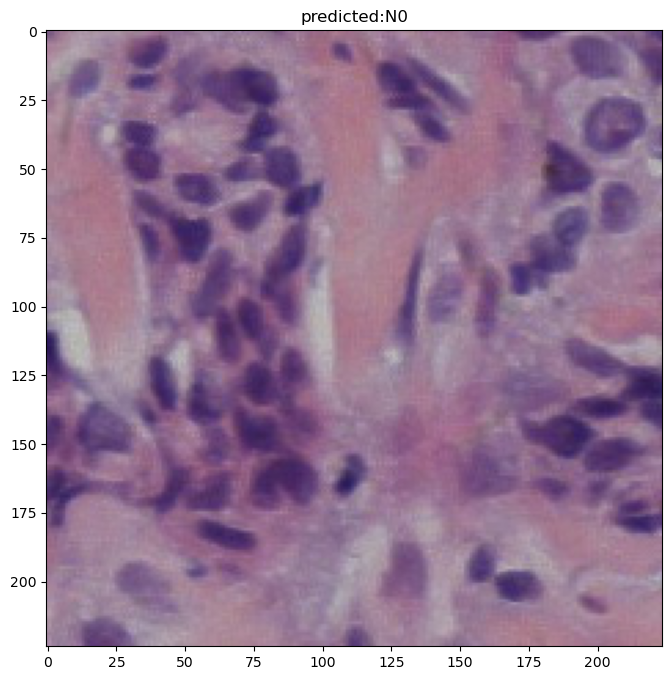

Actual label 1


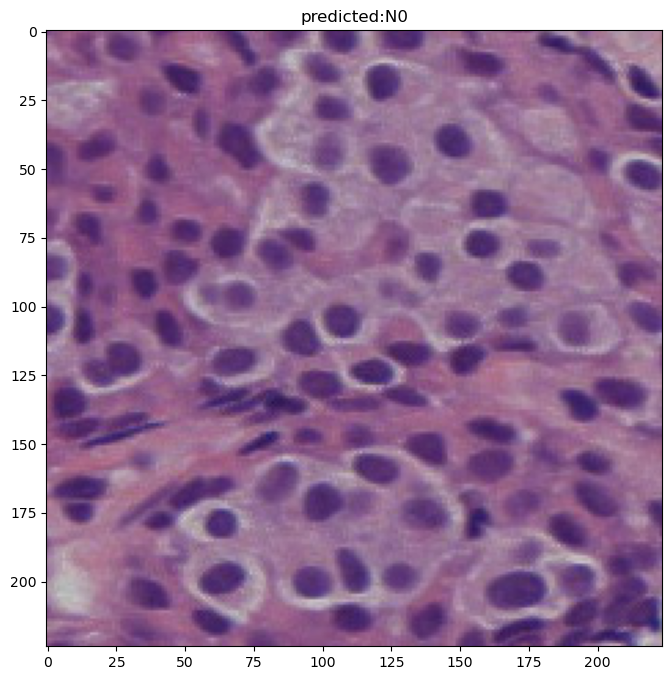

Actual label 1


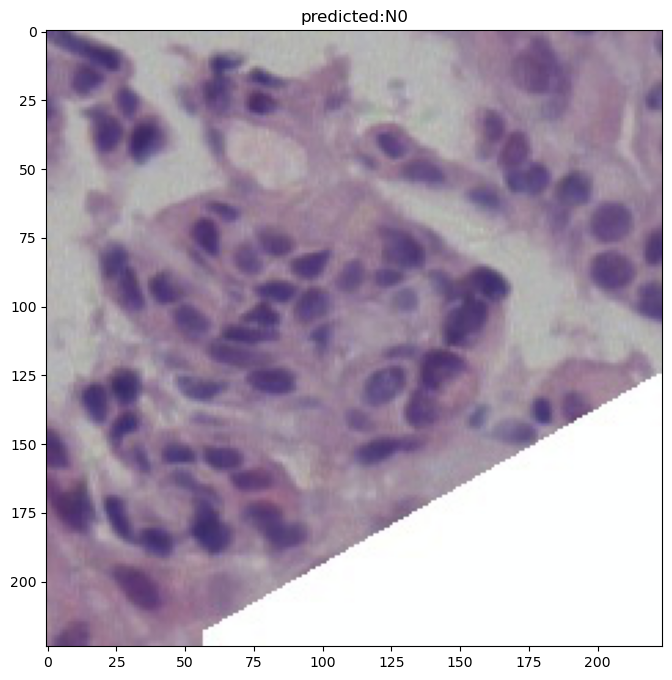

Actual label 0


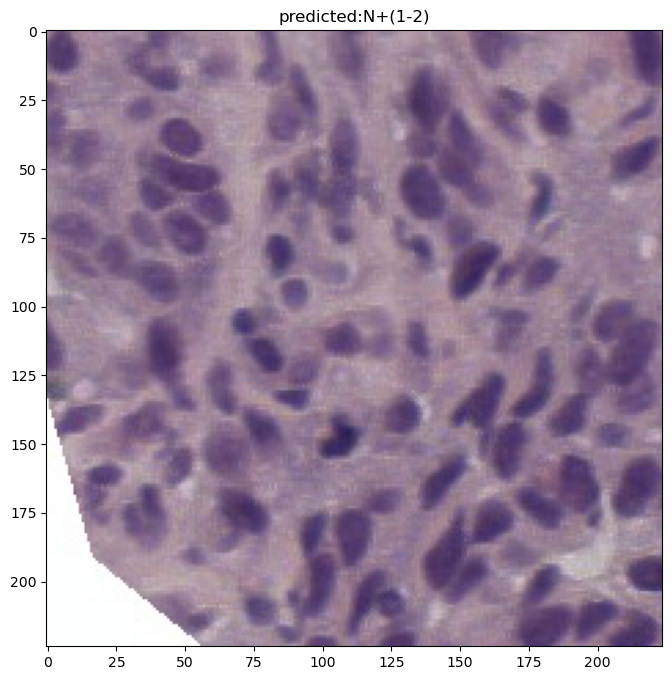

In [61]:
with torch.no_grad():
    
    inputs, labels = next(iter(dataloaders['test']))
    
    inputs = inputs.to(device)
    inp=torchvision.utils.make_grid(inputs)
    
    outputs= model(inputs)
    
    _, preds= torch.max(outputs, 1)
    
    for j in range(len(inputs)):
        print('Actual label', np.array(labels)[j])
        
        inp=inputs.data[j]
        
        imshow(inp, 'predicted:' + class_names[preds[j]])
        

In [62]:
from sklearn.metrics import f1_score, confusion_matrix

In [72]:
with torch.no_grad():
    
    
    
    inputs, labels = next(iter(dataloaders['test']))
    
    inputs = inputs.to(device)
    inp=torchvision.utils.make_grid(inputs)
    
    outputs= model(inputs)
    
    _, preds= torch.max(outputs, 1)
    
        
    labels_cpu=labels.cpu().numpy()
    predicted_cpu=preds.cpu().numpy()
        
    f1score=f1_score(labels_cpu, predicted_cpu,average='weighted')
        
    print('F1 Score:', f1score)

F1 Score: 1.0


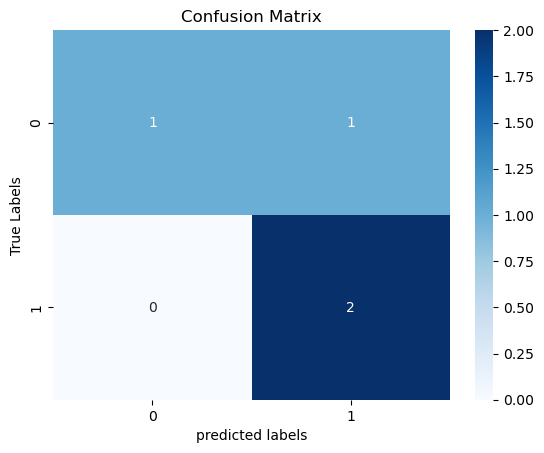

In [73]:
import seaborn as sns

with torch.no_grad():
    
    inputs, labels = next(iter(dataloaders['test']))
    
    inputs = inputs.to(device)
    inp=torchvision.utils.make_grid(inputs)
    
    outputs= model(inputs)
    
    _, preds= torch.max(outputs, 1)
    
        
    labels_cpu=labels.cpu().numpy()
    predicted_cpu=preds.cpu().numpy()
        
    conf_matrix=confusion_matrix(labels_cpu, predicted_cpu)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues',fmt='g')
    plt.xlabel('predicted labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
        
    plt.show()
        
        
        


In [75]:
from sklearn.metrics import precision_score, recall_score

In [76]:
with torch.no_grad():
    
    inputs, labels = next(iter(dataloaders['test']))
    
    inputs = inputs.to(device)
    inp=torchvision.utils.make_grid(inputs)
    
    outputs= model(inputs)
    
    _, preds= torch.max(outputs, 1)
    
        
    labels_cpu=labels.cpu().numpy()
    predicted_cpu=preds.cpu().numpy()
        
    precision_cpu=precision_score(labels_cpu, predicted_cpu, average='weighted')
    recall_cpu=recall_score(labels_cpu, predicted_cpu, average='weighted')
    
    print('Precision Score: ', precision_cpu)
    print('Recall Score: ', recall_cpu)
        

Precision Score:  1.0
Recall Score:  1.0
